In [1]:
from sys import path as sp
from pathlib import Path
from os import path

# Make scripts directory importable
sp.append(path.join((Path.cwd()).parent,"scripts"))

# Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from filepaths import paths
from visualisers import plot_history, plot_activity, plot_axis, plot_features, plot_full, plot_full_v2
from dataloader import unlink_DStore, load_to_df, get_m_features, extract_features, get_real_testdata, get_training_files

In [3]:
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from modelling_utils import encode, scale_255, scale_vals, scaled_data, get_frames

# Read Files & Set Column Names

In [4]:
# Self Training Data
trainfiles = get_training_files()
testfiles = get_real_testdata()

train_cols = ['Activity_code', 'ax', 'ay', 'az', 'gx', 'gy', 'gz']
test_cols = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

targetfiles = testfiles
cols = test_cols

targetfiles = unlink_DStore(targetfiles)

targetfiles

[PosixPath('/Users/anderson/Desktop/github/capstoneml/datasets/test/idle_shield.txt'),
 PosixPath('/Users/anderson/Desktop/github/capstoneml/datasets/test/walk.txt'),
 PosixPath('/Users/anderson/Desktop/github/capstoneml/datasets/test/walk_rm_start_end.txt')]

In [5]:
idx = 1
df = load_to_df(targetfiles[idx:idx+1], cols)
df['time']=[i+1 for i in range(df.shape[0])]
df['gz'] = df['gz'].str.slice(start=0, stop=-1)
df['gz'] = df['gz'].astype('int')

# Feature Extraction

In [6]:
df_copy = df.copy()
timestep = 20
data = scale_vals(df_copy)
feat_df = extract_features(data, timestep)
feat_df

/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["a"] = np.linalg.norm(
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["g"] = np.linalg.norm(
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,max_a,min_a,range_a,mean_a,std_a,max_g,min_g,range_g,mean_g,std_g,time
0,0.911746,0.903102,0.008643,0.907584,0.002657,0.871762,0.860478,0.011284,0.865650,0.002747,0
1,0.916255,0.909677,0.006578,0.912582,0.001692,0.867252,0.853615,0.013637,0.859622,0.003238,1
2,0.916255,0.911256,0.004999,0.913624,0.001309,0.867181,0.858143,0.009038,0.862651,0.002539,2
3,0.915785,0.910801,0.004984,0.913800,0.001639,0.862647,0.860371,0.002276,0.862197,0.000923,3
4,0.918727,0.912150,0.006577,0.914661,0.001726,0.864935,0.860371,0.004564,0.861977,0.001488,4
...,...,...,...,...,...,...,...,...,...,...,...
64,0.885979,0.785577,0.100402,0.850001,0.031979,1.039593,0.898741,0.140852,0.968568,0.041480,64
65,0.764424,0.701610,0.062814,0.725648,0.017972,1.054027,0.758679,0.295348,0.899327,0.121140,65
66,0.751970,0.719840,0.032130,0.735791,0.009127,0.934239,0.808538,0.125701,0.866781,0.044288,66
67,0.735009,0.672969,0.062040,0.714985,0.020009,1.124424,0.876231,0.248192,0.956199,0.055566,67


In [7]:
feat_df = extract_features(data[:600], timestep)

/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["a"] = np.linalg.norm(
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["g"] = np.linalg.norm(
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [13]:
max(feat_df['std_a'])

0.1649075880766089

In [15]:
feat_df1 = extract_features(data[600:], timestep, timestart=feat_df.shape[0])

/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["a"] = np.linalg.norm(
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["g"] = np.linalg.norm(
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [27]:
trydf = feat_df.append(feat_df1)
trydf.index=trydf['time']
trydf

/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_33390/1616978559.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trydf = feat_df.append(feat_df1)


,max_a,min_a,range_a,mean_a,std_a,max_g,min_g,range_g,mean_g,std_g,time
time,,,,,,,,,,,
0,0.911746,0.903102,0.008643,0.907584,0.002657,0.871762,0.860478,0.011284,0.865650,0.002747,0
1,0.916255,0.909677,0.006578,0.912582,0.001692,0.867252,0.853615,0.013637,0.859622,0.003238,1
2,0.916255,0.911256,0.004999,0.913624,0.001309,0.867181,0.858143,0.009038,0.862651,0.002539,2
3,0.915785,0.910801,0.004984,0.913800,0.001639,0.862647,0.860371,0.002276,0.862197,0.000923,3
4,0.918727,0.912150,0.006577,0.914661,0.001726,0.864935,0.860371,0.004564,0.861977,0.001488,4
...,...,...,...,...,...,...,...,...,...,...,...
64,0.885979,0.785577,0.100402,0.850001,0.031979,1.039593,0.898741,0.140852,0.968568,0.041480,64
65,0.764424,0.701610,0.062814,0.725648,0.017972,1.054027,0.758679,0.295348,0.899327,0.121140,65
66,0.751970,0.719840,0.032130,0.735791,0.009127,0.934239,0.808538,0.125701,0.866781,0.044288,66


In [7]:
from start_detector import Detector

the_D = Detector()

In [8]:
data=data.drop(['time'], axis=1)
data

,ax,ay,az,gx,gy,gz
0,0.360784,0.474510,0.682353,0.509804,0.490196,0.501961
1,0.364706,0.478431,0.678431,0.501961,0.490196,0.501961
2,0.364706,0.474510,0.678431,0.501961,0.490196,0.501961
3,0.364706,0.474510,0.678431,0.505882,0.494118,0.501961
4,0.364706,0.474510,0.682353,0.509804,0.494118,0.505882
...,...,...,...,...,...,...
1380,0.266667,0.447059,0.501961,0.450980,0.560784,0.486275
1381,0.254902,0.443137,0.501961,0.447059,0.588235,0.513725
1382,0.270588,0.439216,0.517647,0.443137,0.619608,0.541176
1383,0.321569,0.443137,0.564706,0.482353,0.686275,0.545098


In [9]:
testing_class = [data.iloc[i].tolist() for i in range(data.shape[0])]
out = []
for d in testing_class:
    o = the_D.eval_data(d)
    out.append(o)

1/1 [==============================] - 0s 55ms/step
[3]
1/1 [==============================] - 0s 6ms/step


/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["a"]=np.linalg.norm((data["ax"],data["ay"],data["az"]), axis=0)
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["g"]=np.linalg.norm((data["gx"],data["gy"],data["gz"]), axis=0)
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

[1]


In [10]:
keep=[]
for i in range(0,len(out)):
    if out[i]!=5:
        keep.append(i)
    
for i in keep:
    print(out[i], end=", ")


4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [11]:
from scipy.stats import stats

ans = stats.mode([3])[0][0]
print(ans)

3


/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_56934/3499844082.py:3: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  ans = stats.mode([3])[0][0]
/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_56934/3499844082.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ans = stats.mode([3])[0][0]


In [28]:
fdf = data[60:80]
fdf["a"] = np.linalg.norm(
    (fdf["ax"],fdf["ay"],fdf["az"]), axis=0
)
fdf["g"] = np.linalg.norm(
    (fdf["gx"],fdf["gy"],fdf["gz"]), axis=0
)

/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_33390/1711175892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["a"] = np.linalg.norm(
/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_33390/1711175892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["g"] = np.linalg.norm(


,ax,ay,az,gx,gy,gz,time,a,g
60,0.368627,0.478431,0.686275,0.501961,0.494118,0.498039,61,0.914197,0.862647
61,0.368627,0.474510,0.686275,0.498039,0.494118,0.498039,62,0.912150,0.860371
62,0.368627,0.478431,0.686275,0.501961,0.494118,0.498039,63,0.914197,0.862647
63,0.372549,0.478431,0.686275,0.501961,0.494118,0.498039,64,0.915785,0.862647
64,0.372549,0.478431,0.686275,0.501961,0.494118,0.498039,65,0.915785,0.862647
65,0.368627,0.474510,0.686275,0.501961,0.494118,0.498039,66,0.912150,0.862647
66,0.368627,0.478431,0.686275,0.501961,0.494118,0.498039,67,0.914197,0.862647
67,0.368627,0.478431,0.686275,0.501961,0.490196,0.498039,68,0.914197,0.860407
68,0.372549,0.478431,0.686275,0.501961,0.490196,0.498039,69,0.915785,0.860407
69,0.372549,0.478431,0.686275,0.501961,0.490196,0.498039,70,0.915785,0.860407


In [31]:
fdf['a'].std()

0.0016393200163237088

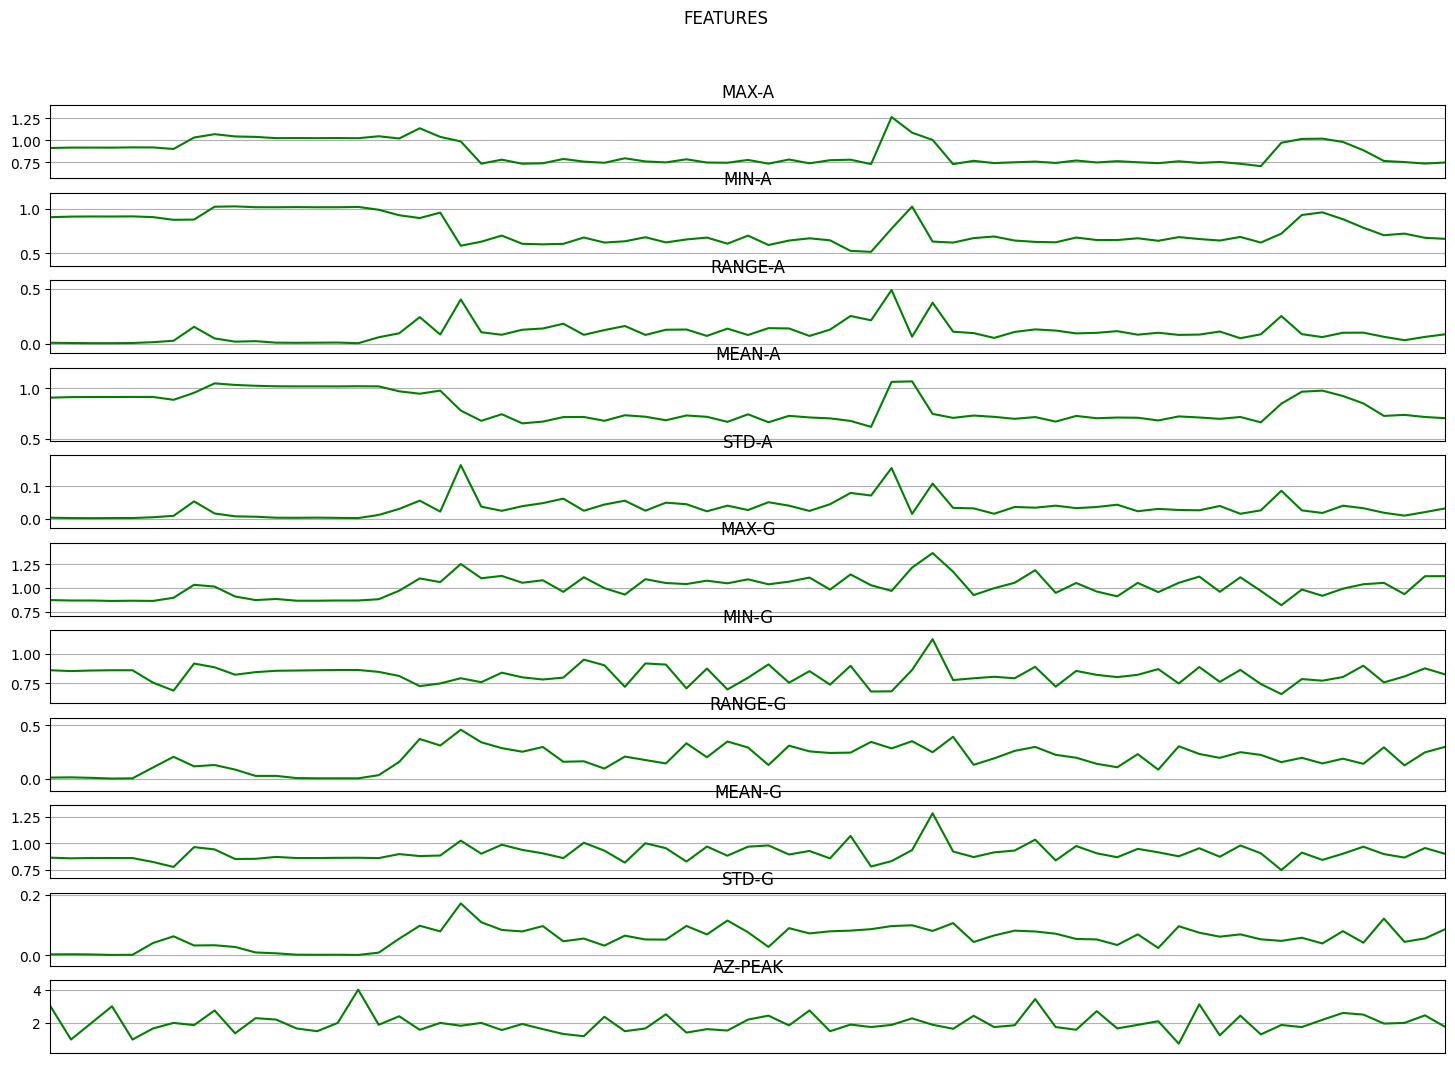

In [92]:
plot_features("FEATURES",feat_df)

# Visualise Data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


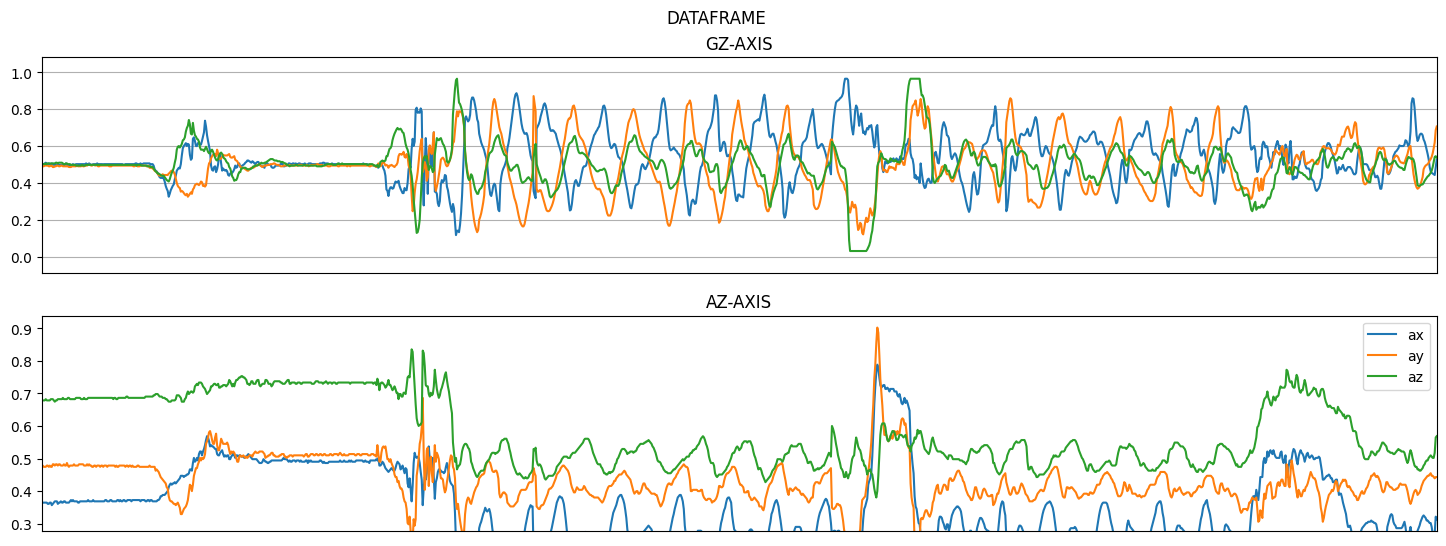

In [93]:
plot_full_v2(df_copy)

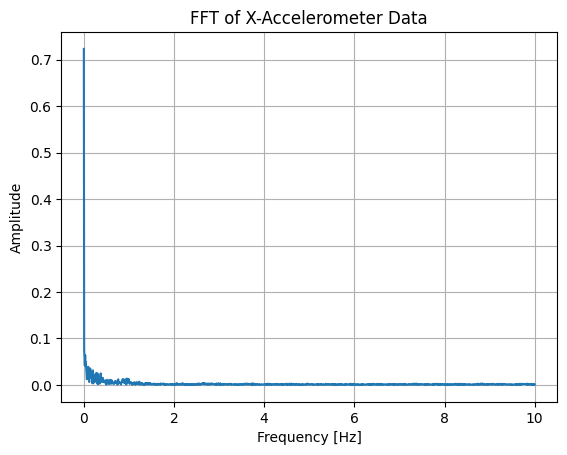

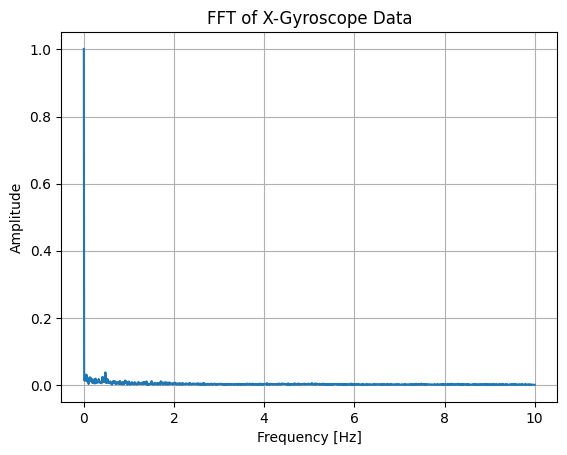

In [11]:
N = (data.shape[0])  # Number of elements
FS = 20
# Compute FFTs
freqBins = np.linspace(0, FS / 2, N // 2)  # Freq. labels [Hz]
fax = np.fft.fft(data['ax'])  # FFT of accel. data
fgx = np.fft.fft(data['gx'])  # FFT of gyro data

# Plot x-accel. FFT
plt.figure()
plt.plot(freqBins, (2 / N) * np.abs(fax[:N // 2]))
plt.title('FFT of X-Accelerometer Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# Plot x-gyro. FFT
plt.figure()
plt.plot(freqBins, (2 / N) * np.abs(fgx[:N // 2]))
plt.title('FFT of X-Gyroscope Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [12]:
from scipy import signal

AX Noise Density: 2409.595028 ug/sqrt(Hz)
AY Noise Density: 1319.292600 ug/sqrt(Hz)
AZ Noise Density: 1204.076988 ug/sqrt(Hz)
GX Noise Density: 0.025588 dps/sqrt(Hz)
GY Noise Density: 0.023703 dps/sqrt(Hz)
GZ Noise Density: 0.023465 dps/sqrt(Hz)


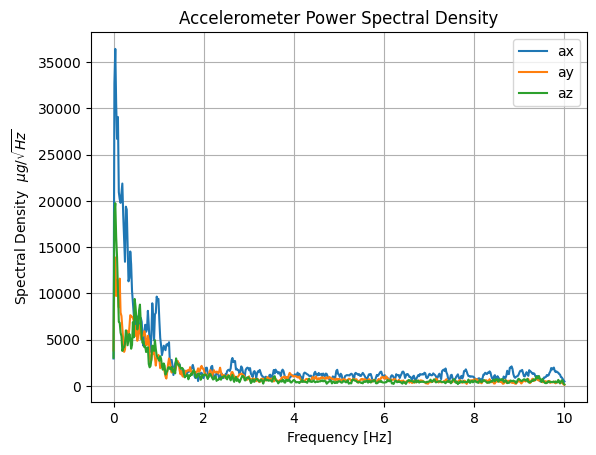

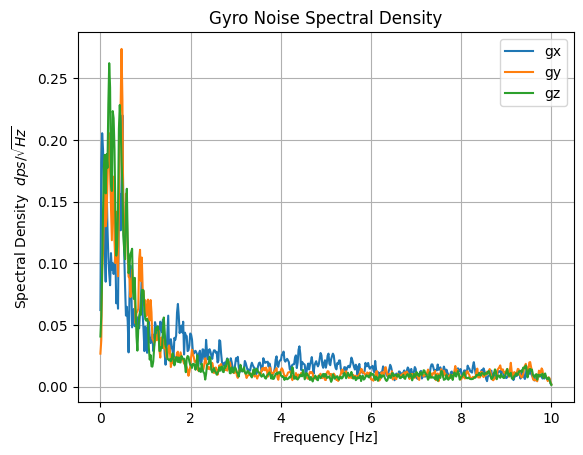

In [13]:
accel2ug = 1e6 / 9.80665

# Compute PSD via Welch algorithm
freqax, psdax = signal.welch(data['ax'], FS, nperseg=1024, scaling='density')  # ax
freqay, psday = signal.welch(data['ay'], FS, nperseg=1024, scaling='density')  # ay
freqaz, psdaz = signal.welch(data['az'], FS, nperseg=1024, scaling='density')  # az

freqgx, psdgx = signal.welch(data['gx'], FS, nperseg=1024, scaling='density')  # gx
freqgy, psdgy = signal.welch(data['gy'], FS, nperseg=1024, scaling='density')  # gy
freqgz, psdgz = signal.welch(data['gz'], FS, nperseg=1024, scaling='density')  # gz

# Convert to [ug / sqrt(Hz)]
psdax = np.sqrt(psdax) * accel2ug
psday = np.sqrt(psday) * accel2ug
psdaz = np.sqrt(psdaz) * accel2ug

psdgx = np.sqrt(psdgx)
psdgy = np.sqrt(psdgy)
psdgz = np.sqrt(psdgz)

# Compute noise spectral densities
ndax = np.mean(psdax)
nday = np.mean(psday)
ndaz = np.mean(psdaz)
print('AX Noise Density: %f ug/sqrt(Hz)' % (ndax))
print('AY Noise Density: %f ug/sqrt(Hz)' % (nday))
print('AZ Noise Density: %f ug/sqrt(Hz)' % (ndaz))

ndgx = np.mean(psdgx)
ndgy = np.mean(psdgy)
ndgz = np.mean(psdgz)
print('GX Noise Density: %f dps/sqrt(Hz)' % (ndgx))
print('GY Noise Density: %f dps/sqrt(Hz)' % (ndgy))
print('GZ Noise Density: %f dps/sqrt(Hz)' % (ndgz))


# Plot accel. data
plt.figure()
plt.plot(freqax, psdax, label='ax')
plt.plot(freqay, psday, label='ay')
plt.plot(freqaz, psdaz, label='az')
plt.title('Accelerometer Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Spectral Density  $\mu g / \sqrt{Hz}$')
plt.legend()
plt.grid()

# Plot gyro data
plt.figure()
plt.plot(freqgx, psdgx, label='gx')
plt.plot(freqgy, psdgy, label='gy')
plt.plot(freqgz, psdgz, label='gz')
plt.title('Gyro Noise Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Spectral Density  $dps / \sqrt{Hz}$')
plt.legend()
plt.grid()
plt.show()


In [12]:
Fs=20
activities = df['Activity_code'].value_counts().index
activities

KeyError: 'Activity_code'

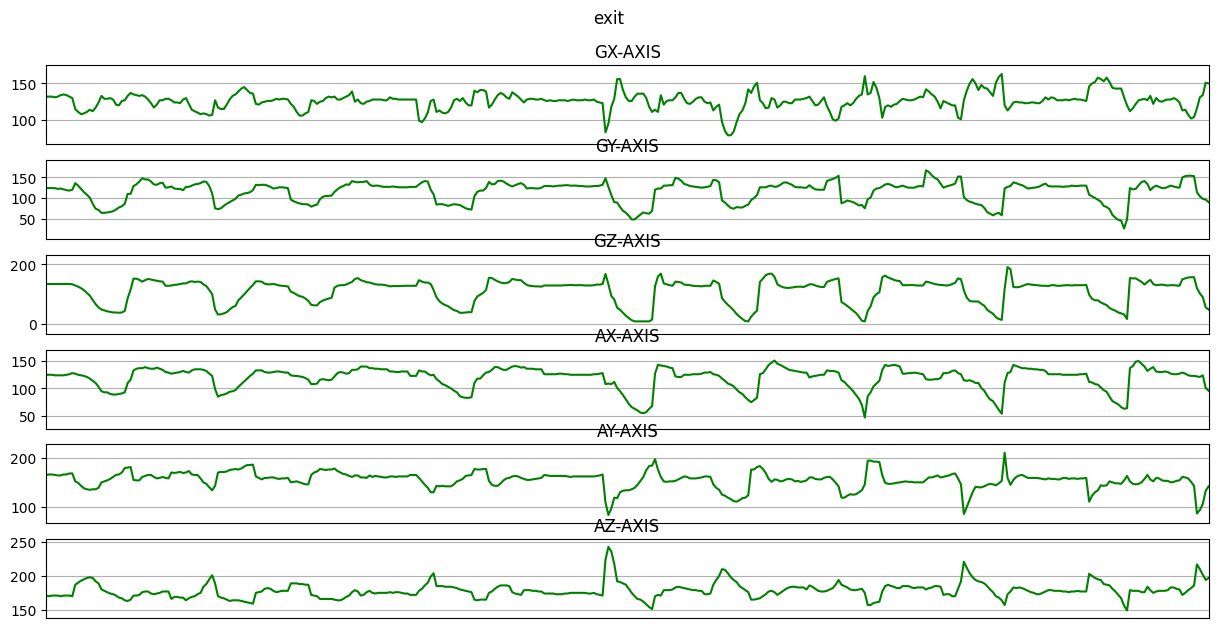

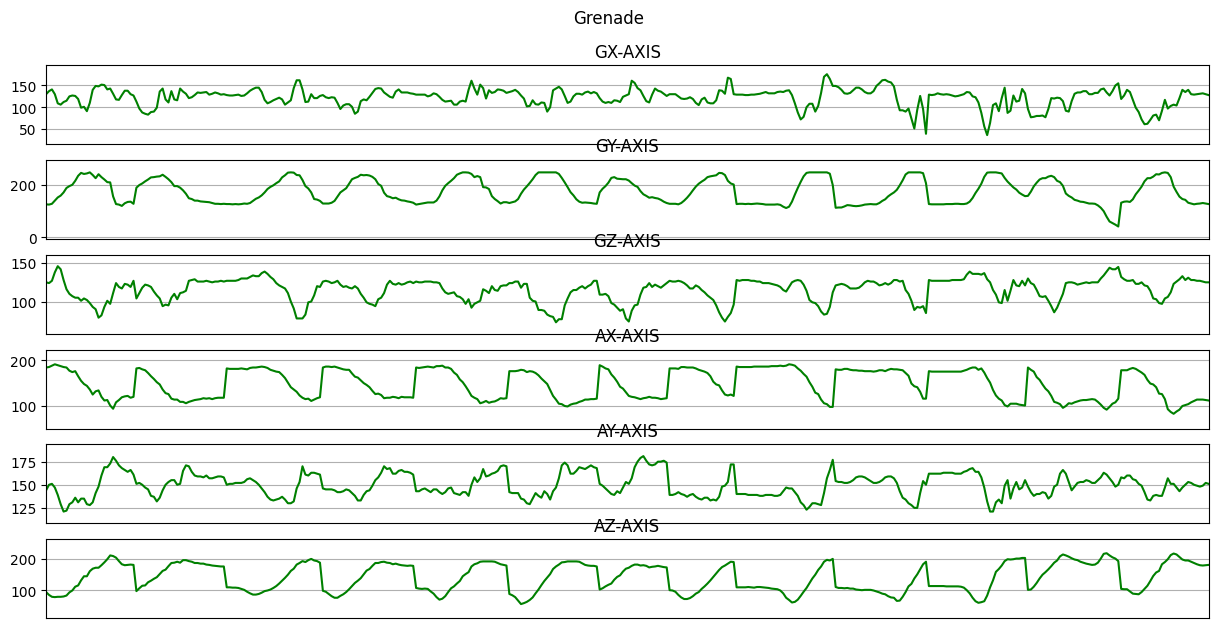

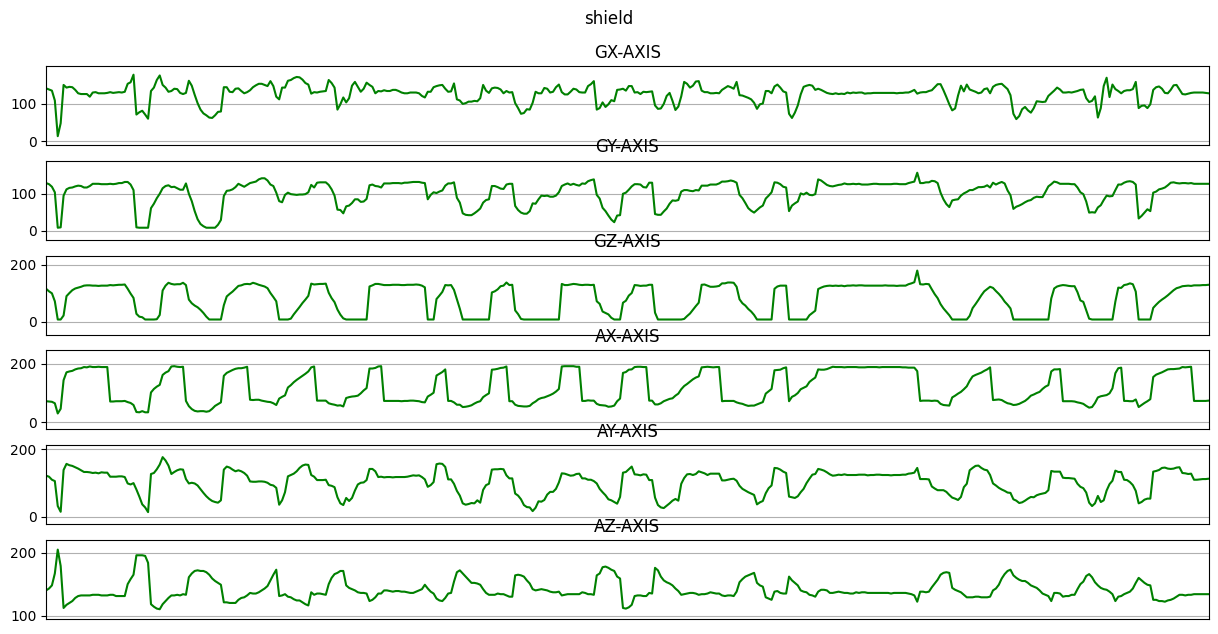

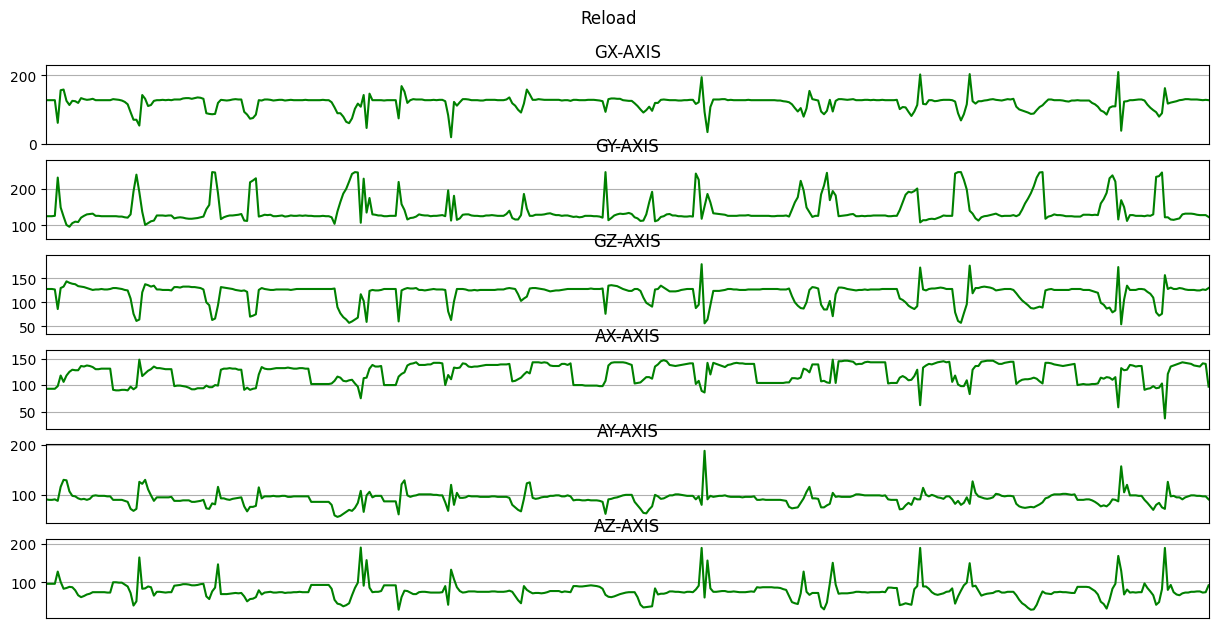

In [27]:
filt_df = df
for activity in activities:
    data_for_plot = filt_df[(filt_df['Activity_code'] == activity)][:Fs*20]
    plot_activity(activity, data_for_plot)


In [22]:
# filt_df = filt_df.drop('Subject_id', axis=1)
filt_df = filt_df.drop('time', axis=1)

In [15]:
df_copy, label = encode(df_copy)

print(label.classes_)
df_copy.head()

,Activity_code,ax,ay,az,gx,gy,gz,time,label
0,shield,72,122,140,140,129,116,1,3
1,shield,71,119,143,137,126,107,2,3
2,shield,70,110,148,134,119,100,3,3
3,shield,65,106,167,108,104,72,4,3
4,shield,30,32,205,14,8,8,5,3


In [59]:
# ds_X = data[['ax','ay','az','gx','gy','gz']]
# # ds_Y = data['label']
# scaled_X = pd.DataFrame(data=ds_X, columns=['ax','ay','az','gx','gy','gz'])
# # scaled_X['Activity_code'] = ds_Y.values
scaled_X = scaled_data(data, labelled=False)

In [7]:
seconds = 1
Fs = 20
frame_size = Fs*seconds # 20Hz * 1 = 20
hop_size = Fs*seconds

In [9]:
x, y = get_frames(data, frame_size, hop_size, labelled=False)

In [10]:
x.shape#, y.shape

(69, 20, 6)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((99, 20, 6), (25, 20, 6), (99,), (25,))

# Confusion Matrix

In [29]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [66]:
# idx = 41
# y_pred = model.predict(x[idx:idx+5])
y_pred = model.predict(x)
classes_y = np.argmax(y_pred,axis=1)
chances = np.array([y_pred[i][np.argmax(y_pred[i])] for i in range(y_pred.shape[0])])

for i in range(chances.shape[0]):
    if chances[i] < 0.95:
        print(0, end=" ")
    else:
        print(classes_y[i], end=" ")

chances.shape[0]

2/2 [==============================] - 0s 2ms/step
2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 0 0 0 1 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 

51

In [31]:
print(classes_y)

[2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 0 0 3 2 2 2 2 0 1 3 3 3 3 1 3 3 3 3 3 2 2 0
 1 2 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 0 2 2 1 3 1 3 3 3 3 3 3 1 3 1 3 3 3
 1 2 1 3 3 3 3 3 3 3 3 0 2 2 0 3 1 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 0 2 2 2 2
 2 2 2 2 2 3 3 2 2 2 2 3 3 1 3 3 3 3 0 3 1 3]


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

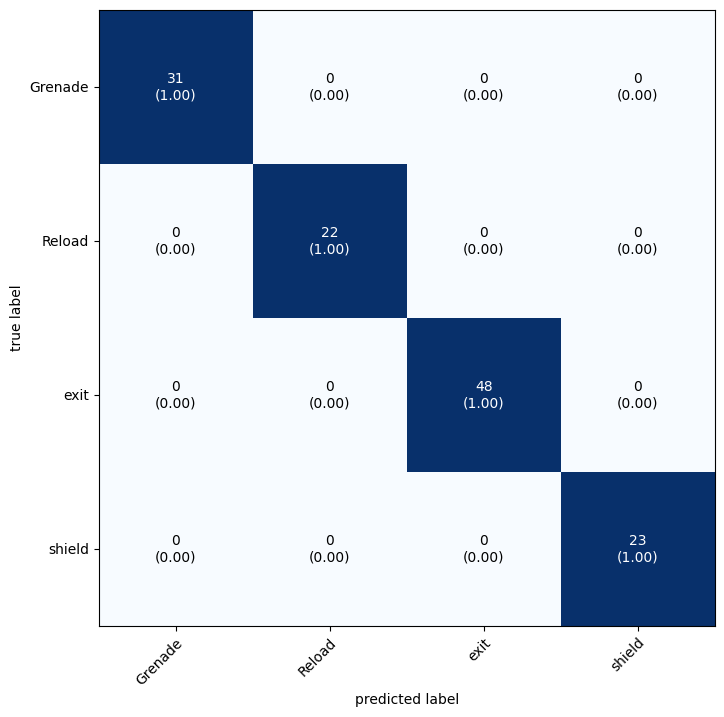

In [46]:
real_y = y
# real_y = Y_test

mat = confusion_matrix(real_y, classes_y)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True,figsize=(8,8))


# Load Model

In [11]:
model_name = 'model_cnn_real_0'
MODEL_DIR = Path(paths.get('MODEL_DIR'), f'{model_name}.h5')
model = tf.keras.models.load_model(MODEL_DIR)


In [12]:
y_pred = model.predict(x)
classes_y = np.argmax(y_pred,axis=1)
classes_y

3/3 [==============================] - 0s 770us/step


2022-10-05 18:46:07.269336: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


array([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3,
       1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 2, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3])

In [65]:
Y_test[0:20]

array([0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 3])

# Save Numpy

In [66]:
# outpath = paths.get('WEIGHT_DIR')
outpath = paths.get('MODEL_DIR')
outpath = Path(outpath, 'weights', 'conv_layers_real')
# SAVE NP
save_np = layers

np.save(outpath, save_np)

In [67]:
dataframe = np.array([X_train, X_test, Y_train, Y_test])

outpath = paths.get('MODEL_DIR')
outpath = Path(outpath, 'weights', 'conv_df_real')

np.save(outpath, dataframe)

/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_89833/2982726952.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataframe = np.array([X_train, X_test, Y_train, Y_test])
